In [0]:
# imports needed and set up logging
import pandas as pd
import numpy as np
import gensim
import logging
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# import dataframe
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Big Armor/toxic-train_vader.csv")
df.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,neg,neu,pos,compound
0,0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,0.000,0.905,0.095,0.5574
1,1,000103f0d9cfb60f,d'aww he matches this background colour i'm se...,0,0,0,0,0,0,0.101,0.754,0.146,0.2263
2,2,000113f07ec002fd,hey man i'm really not trying to edit war it's...,0,0,0,0,0,0,0.083,0.849,0.068,-0.1779
3,3,0001b41b1c6bb37e,""" more i can't make any real suggestions on im...",0,0,0,0,0,0,0.022,0.916,0.062,0.5106
4,4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0.000,0.663,0.337,0.6808


In [4]:
# print head of desired column
df['comment_text'].head()

0    explanation why the edits made under my userna...
1    d'aww he matches this background colour i'm se...
2    hey man i'm really not trying to edit war it's...
3    " more i can't make any real suggestions on im...
4    you sir are my hero any chance you remember wh...
Name: comment_text, dtype: object

In [0]:
# to list
sen = df['comment_text'].tolist()

In [6]:
sen[:3]

["explanation why the edits made under my username hardcore metallica fan were reverted they weren't vandalisms just closure on some gas after i voted at new york dolls fac and please don't remove the template from the talk page since i'm retired now 89 205 38 27",
 "d'aww he matches this background colour i'm seemingly stuck with thanks (talk) 21:51 january 11 2016 (utc)",
 "hey man i'm really not trying to edit war it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info"]

### 1. Begin by turning Strings to Vectors

In [7]:
documents = sen[:]
documents

["explanation why the edits made under my username hardcore metallica fan were reverted they weren't vandalisms just closure on some gas after i voted at new york dolls fac and please don't remove the template from the talk page since i'm retired now 89 205 38 27",
 "d'aww he matches this background colour i'm seemingly stuck with thanks (talk) 21:51 january 11 2016 (utc)",
 "hey man i'm really not trying to edit war it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info",
 '" more i can\'t make any real suggestions on improvement - i wondered if the section statistics should be later on or a subsection of ""types of accidents"" -i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no-one else does first - if you have any preferences for formatting style on references or want to

In [0]:
from pprint import pprint  # pretty-printer
from collections import defaultdict

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

In [9]:
documents = texts[:1000]
documents

[['explanation',
  'why',
  'edits',
  'made',
  'under',
  'my',
  'username',
  'hardcore',
  'metallica',
  'fan',
  'were',
  'reverted',
  'they',
  "weren't",
  'vandalisms',
  'just',
  'closure',
  'on',
  'some',
  'gas',
  'after',
  'i',
  'voted',
  'at',
  'new',
  'york',
  'dolls',
  'fac',
  'please',
  "don't",
  'remove',
  'template',
  'from',
  'talk',
  'page',
  'since',
  "i'm",
  'retired',
  'now',
  '89',
  '205',
  '38',
  '27'],
 ['he',
  'matches',
  'this',
  'background',
  'colour',
  "i'm",
  'seemingly',
  'stuck',
  'with',
  'thanks',
  '(talk)',
  '21:51',
  'january',
  '11',
  '2016',
  '(utc)'],
 ['hey',
  'man',
  "i'm",
  'really',
  'not',
  'trying',
  'edit',
  'war',
  "it's",
  'just',
  'that',
  'this',
  'guy',
  'is',
  'constantly',
  'removing',
  'relevant',
  'information',
  'talking',
  'me',
  'through',
  'edits',
  'instead',
  'my',
  'talk',
  'page',
  'he',
  'seems',
  'care',
  'more',
  'about',
  'formatting',
  'than

In [10]:
# model = gensim.models.Word2Vec(documents, min_count=1)

model = gensim.models.Word2Vec(documents,)
model.train(documents, total_examples=len(documents), epochs=10)

2020-05-07 15:05:46,341 : INFO : collecting all words and their counts
2020-05-07 15:05:46,342 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-07 15:05:46,357 : INFO : collected 9653 word types from a corpus of 57257 raw words and 1000 sentences
2020-05-07 15:05:46,357 : INFO : Loading a fresh vocabulary
2020-05-07 15:05:46,364 : INFO : effective_min_count=5 retains 1601 unique words (16% of original 9653, drops 8052)
2020-05-07 15:05:46,366 : INFO : effective_min_count=5 leaves 44974 word corpus (78% of original 57257, drops 12283)
2020-05-07 15:05:46,373 : INFO : deleting the raw counts dictionary of 9653 items
2020-05-07 15:05:46,375 : INFO : sample=0.001 downsamples 64 most-common words
2020-05-07 15:05:46,377 : INFO : downsampling leaves estimated 34581 word corpus (76.9% of prior 44974)
2020-05-07 15:05:46,383 : INFO : estimated required memory for 1601 words and 100 dimensions: 2081300 bytes
2020-05-07 15:05:46,386 : INFO : resetting layer weig

(345870, 572570)

In [11]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['explanation', 'why', 'edits', 'made', 'under', 'my', 'username', 'fan', 'were', 'reverted', 'they', 'just', 'on', 'some', 'after', 'i', 'at', 'new', 'york', 'please', "don't", 'remove', 'template', 'from', 'talk', 'page', 'since', "i'm", 'now', 'he', 'this', 'with', 'thanks', '(talk)', '11', '(utc)', 'hey', 'man', 'really', 'not', 'trying', 'edit', 'war', "it's", 'that', 'guy', 'is', 'constantly', 'removing', 'relevant', 'information', 'talking', 'me', 'through', 'instead', 'seems', 'care', 'more', 'about', 'than', 'actual', 'info', '"', "can't", 'make', 'any', 'real', 'suggestions', 'improvement', '-', 'if', 'section', 'statistics', 'should', 'be', 'later', 'or', 'think', 'references', 'may', 'need', 'so', 'are', 'all', 'same', 'format', 'ie', 'date', 'etc', 'can', 'do', 'else', 'does', 'first', 'you', 'have', 'style', 'want', 'it', 'yourself', 'let', 'know', 'there', 'appears', 'articles', 'review', 'guess', 'delay', 'until', 'up', 'listed', 'form', 'chance', 'remember', 'what', "t

In [0]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in take(500, model.wv.vocab):
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(25, 25)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


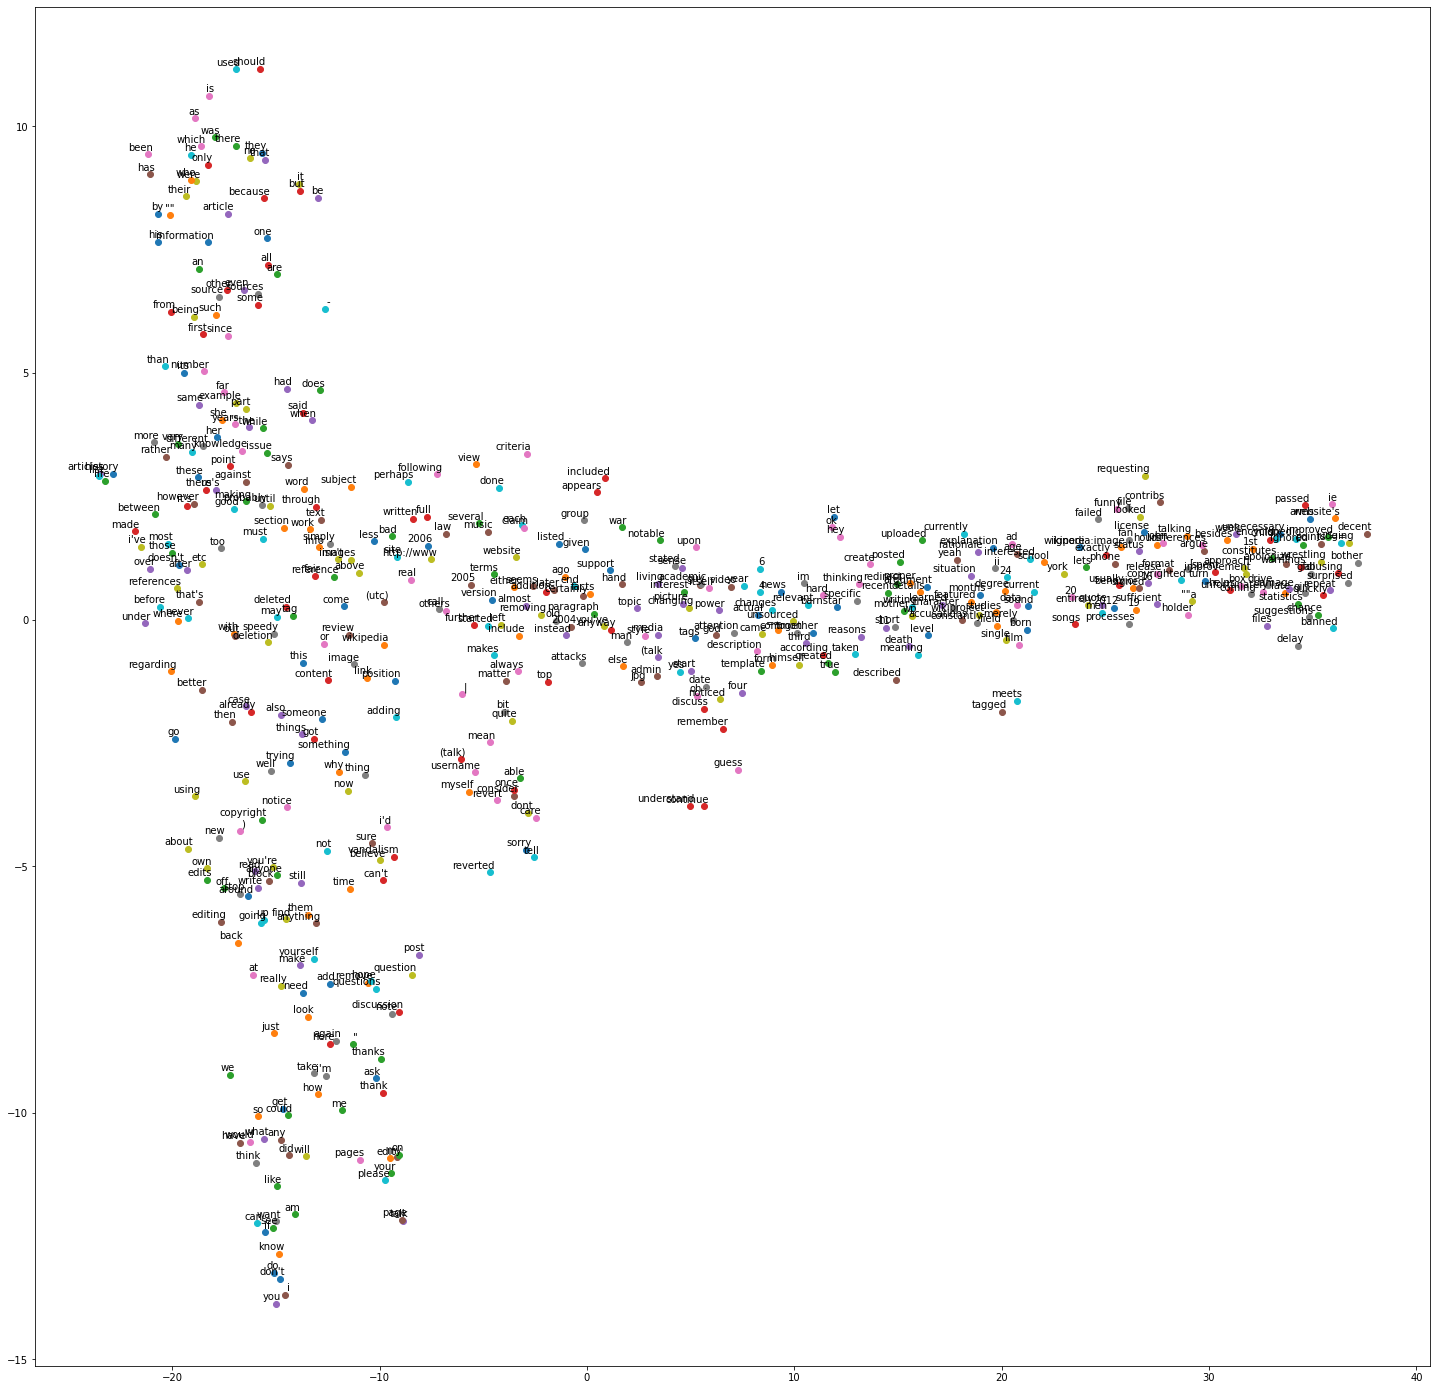

In [14]:
tsne_plot(model)